# Insights from Music: Spotify Data Visualization & Analysis
#### Andy Xu, Rohan Desai
#### December 8, 2023

Music, as a form of creative expression, is a reflection of ourselves—as individuals and as a society. What insights can we extract from the music that we listen to? In this project, we seek to visualize and analyze music data from Spotify to gather insights from our listening habits.

## Introduction to Datasets Used

We used multiple Spotify datasets in this project, along with external datasets. Each of these datasets had their different strengths and weaknesses, leading us to be intentional in our choice of dataset to extract different insights.


First, we used the following dataset from Spotify for our temporal analysis:
https://drive.google.com/file/d/1LWZ914I0s9Ou2j0XA7brANMK3fnhWz2T/view 

Although this dataset only contained data on less than 1,000 songs, it was valuable for temporal analysis as each song contained time-based fields, such as release day, month, and year.


We also used a US GDP Growth Rate dataset in order to correlate music to economic factors. This dataset was fairly straightforward, recording the annual percent change in the US GDP from 1961 to 2022. The economic dataset is linked here: https://www.macrotrends.net/countries/USA/united-states/gdp-growth-rate1

The second major dataset we used was a dataset containing over 100,000 songs from over 125 different genres. Although this album did not contain information on a song's release date, it contained a much larger sample size of songs, allowing us to extract more accurate and useful insights with respect to other non-temporal variables. The dataset is linked here: https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset

## Temporal Dataset Analysis

### Loading the Data

We have the temporal analysis dataset loaded in a local file named "Spotify2023.csv". We before beginning our analysis, we must import our used libraries, and load this data into a pandas dataframe.

We noticed that this dataset had non-numeric values in the "streams" column. Since this was difficult to work with, we parsed the dataset by dropping any rows that had a non-numeric streams value, then converted values in the streams column into integers.

In [93]:
# importing used libraries
import pandas
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
# import our data from our csv file into a dataframe
df = pandas.read_csv("Spotify2023.csv",  encoding='latin-1')
# filter out any non-numeric values and drop them as a row
df = df[df["streams"].apply(lambda x: x.isnumeric())]
# make streams column values into ints
df["streams"] = df["streams"].astype(int)
print(df)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

### Music Valence Over Time

The "valence" of a song is, generally speaking, its "positivity"— with a higher valence value indicating the song as being more positive. In order to analyze the "positivity" of music over time, we calculated the average valence value of all songs in the dataset released in each year.

In order to remove outliers, years in the dataset that had less than 2 songs released were excluded from the dataset, as one song is not a good indicator of all music from that year.

Next, we created a scatterplot with a linear regression of the mean valence versus release year.

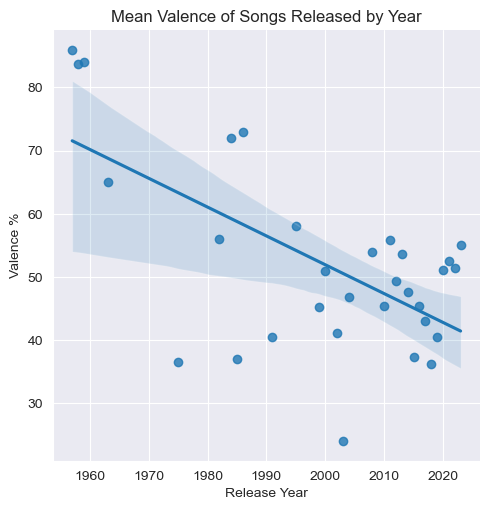

In [95]:
# group song by released year but remove any years that have less than 2 songs
meanValences = df.groupby('released_year').filter(lambda x: len(x) >= 2)

#get the mean of the valence for each year
meanValences = meanValences.groupby('released_year')['valence_%'].mean().reset_index()
meanValences['released_year'] = meanValences['released_year'].astype(int)

#create a scatterlot between mean valence and release year
plot = sns.lmplot(data=meanValences, x="released_year", y="valence_%")
plt.title("Mean Valence of Songs Released by Year")

#create a linear regression for the scatterplot
plot.set(xlabel='Release Year', ylabel='Valence %')

Based on the negative slope of the linear regression, we can see that the average positivity of the music we listen to generally decreases over time.

### Arist Count and Music Popularity

Next we wanted to see if there was a correlation between the number of artists on a song and its popularity.
 
In order to analyze the average popularity of songs with different artist counts, we grouped the songs by the number of artists on each song, and calculated the mean number of streams of songs per a certain number of artists.

Then we created a scatterplot with a linear regression of the number of artists on a song versus the number of streams it had.

0      2
1      1
2      1
3      1
4      1
      ..
948    1
949    1
950    2
951    3
952    1
Name: artist_count, Length: 952, dtype: int64
0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 952, dtype: int64
   artist_count       streams
0             1  5.682117e+08
1             2  4.624808e+08
2             3  3.813421e+08
3             4  3.061062e+08
4             5  1.448082e+08
5             6  8.746645e+07
6             7  3.390601e+08
7             8  1.732212e+08


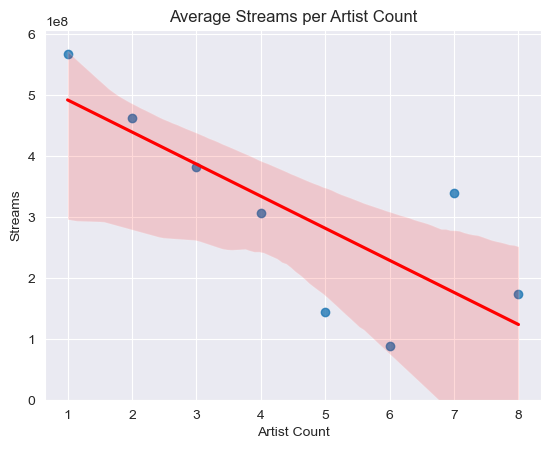

In [96]:
# graph correlation between artist count & streams
print(df["artist_count"])
print(df["streams"])
# average artist_count per stream
modified_df = df.groupby("artist_count")['streams'].mean().reset_index()
print(modified_df)
sns.regplot(x="artist_count", y="streams", data=modified_df, line_kws={"color": "red"})
# start y axis at 0
plt.ylim(0, None)
plt.title("Average Streams per Artist Count")
plt.xlabel("Artist Count")
plt.ylabel("Streams")
plt.show()

The scatterplot above shows a clear negative correlation between the artist count and the number of streams a song has. 

Although this may seem counterintuitive and there are certainly counterexamples where collaborations make a song more popular, we hypothesize that the negative correlation may occur because of two reasons. 

First, artists that have a song they think may be a hit may be more willing to release the song solo, as to receive all the credit for the song's success. This means that conversely, songs that may be incomplete or not as strong may be released with multiple artists, as to share the blame for the song's failure and to reduce the necessary work for an individual artist to release a song.

Second, a song with more artists is more likely to be a remix of a popular song, and thus is likely to have less streams than the original song. 

### Release Date and Music Popularity
#### Are Certain Days/Months Better for Releasing Music?

One of the other main questions we wanted to answer with this dataset was how the release timing of a song affected its popularity.

Similar to how artist count was analyzed, we grouped the songs by the day and month they were released, and calculated the mean number of streams of songs released.

Then we used this information to create a bar graph of the average number of streams of songs released.

    released_day       streams
0              1  8.536263e+08
1              2  2.885525e+08
2              3  3.356189e+08
3              4  3.888257e+08
4              5  4.924276e+08
5              6  6.040370e+08
6              7  1.719630e+08
7              8  5.540814e+08
8              9  5.845558e+08
9             10  4.814788e+08
10            11  5.195427e+08
11            12  4.179598e+08
12            13  3.028191e+08
13            14  4.751826e+08
14            15  4.666155e+08
15            16  5.226437e+08
16            17  4.779308e+08
17            18  3.571111e+08
18            19  5.786502e+08
19            20  5.241125e+08
20            21  5.986975e+08
21            22  3.223273e+08
22            23  5.064088e+08
23            24  5.043336e+08
24            25  4.662230e+08
25            26  4.895721e+08
26            27  5.565819e+08
27            28  6.188629e+08
28            29  6.040650e+08
29            30  6.055639e+08
30            31  9.167876e+08


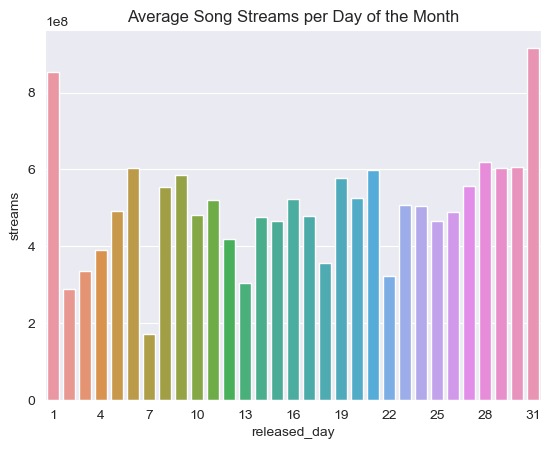

In [97]:
# Correlation between day and streams

# create new dataframe that finds the average streams per month
modified_df = df.groupby("released_day")['streams'].mean().reset_index()
print(modified_df)
# plot the average streams per month
sns.barplot(x="released_day", y="streams", data=modified_df)
# modify x axis to reduce ticks
plt.xticks(np.arange(0, 31, 3))
# title
plt.title("Average Song Streams per Day of the Month")
plt.show()

Based on the bar graph above, we can see that the average number of streams of songs released on the first and last of the month are significantly higher than the average number of streams of songs released on any other day. This may be because these dates are more memorable for both artists and listeners, meaning that artists are more likely to release music on these dates and these dates are easier for listeners to remember and search for.

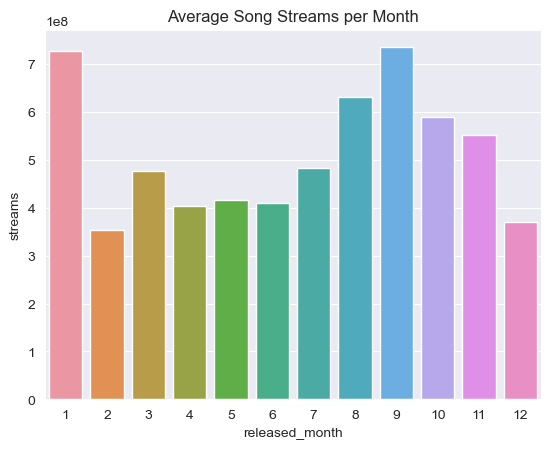

In [98]:
# Correlation between month and streams

# create new dataframe that finds the average streams per month
modified_df = df.groupby("released_month")['streams'].mean().reset_index()
# plot the average streams per month
sns.barplot(x="released_month", y="streams", data=modified_df)
# title
plt.title("Average Song Streams per Month")
plt.show()

We see a few key trends from the bar graph above.

First, we see that the average number of streams for January is much higher than the average number of streams for any other month besides September. This may be because of the New Year's effect, where people are more likely to listen to music at the beginning of the year as they set new goals and resolutions. It may also be because of a similar reason to the first and last of the month effect, where the first month of the year is more memorable and thus more likely to be popular.

In addition, September may also have higher than average streams because it marks the start of the school year, where people are more likely to listen to music as they commute to school or work or begin studying for the year.

## General Dataset Analysis

### Loading the Data
We have the general analysis dataset in a local file named "SpotifyLarge.csv". Before beginning our analysis, we similarly import our used libraries, and load this data into a pandas dataframe.

Because we will be doing natural language processing on the song and album titles, we must first ensure that these columns are string types.

Note that rather than song streams, this dataset contains a "popularity" metric that rates the popularity of a song to a number between 0 and 100 which we will use to analyze the popularity of songs.

In [99]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

df = pd.read_csv("SpotifyLarge.csv")
# ensure track_name is a string type
df["track_name"] = df["track_name"].astype(str)
# ensure album_name is a string type
df["album_name"] = df["album_name"].astype(str)
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Song Volume and Popularity
#### Are louder songs more popular?

One of the first metrics we wanted to analyze was how the volume of a song affected its popularity.

Because sound loudness was given to the thousanths place, we first rounded the song loudness to the nearest decibel. Then we grouped the songs by their loudness, and calculated the mean popularity of songs with each loudness.

Then we used this information to create a barplot of the average popularity of songs with different loudnesses.

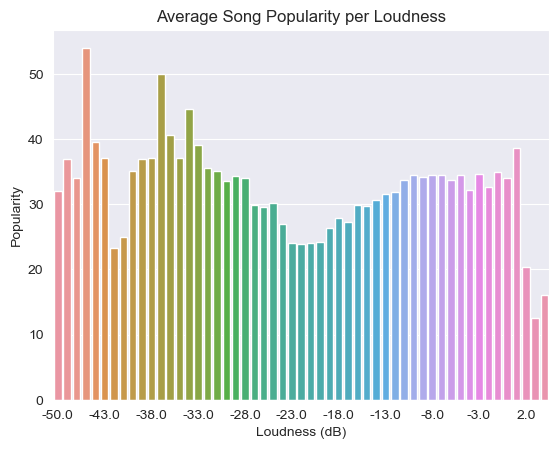

In [100]:
# group loudness column by 1
df['loudness_round'] = df['loudness'].round(0)
modified_df = df.groupby("loudness_round")['popularity'].mean().reset_index()
fig, ax = plt.subplots()
sns.barplot(x="loudness_round", y="popularity", data=modified_df, ax=ax)
# modify x axis to reduce ticks
ax.set_xticks(ax.get_xticks()[::5])
# title
plt.title("Average Song Popularity per Loudness")
# x and y axis labels
plt.xlabel("Loudness (dB)")
plt.ylabel("Popularity")
plt.show()

From the graph above we find an interesting takeaway. We see a bimodal distribution where songs that are quieter and songs that are louder are more popular than songs that are in the middle. This may be because people often stream songs based on their mood—whether it be to relax or get excited—and thus are more likely to prefer songs on both ends of the loudness spectrum.

### Song Length and Popularity

One of the other things we were interested in was the optimal length of a song. We hypothesized that songs that were too short would not be popular because they would not be able to develop a strong melody or beat, and songs that were too long would not be popular because they would be too long to listen to in one sitting.

Similar to our analysis for song loudness, the song length was grouped in 10 second intervals, and the mean popularity of songs with each length was calculated.

Because the dataset contained some outliers with extremely long song lengths, we filtered out outliers that contained less than 5 songs of a given 10 second time interval.

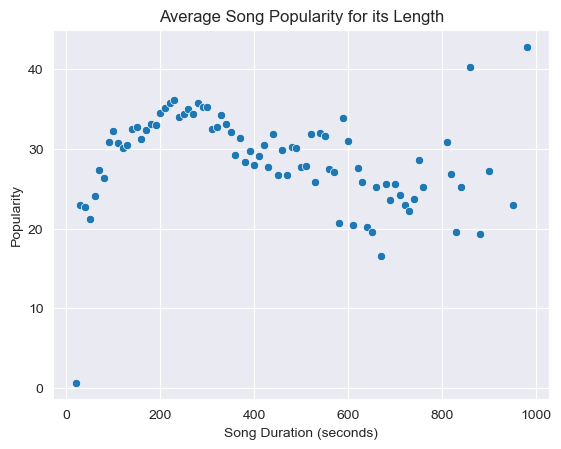

In [101]:
# get song duration in seconds rather than milliseconds
df['duration_round'] = df['duration_ms'] / 1000
# round song duration to nearest 10 seconds
df['duration_round'] = df['duration_round'].round(-1)
# remove outliers where there are less than 5 songs of a duration_round
modified_df = df.groupby("duration_round").filter(lambda x: len(x) > 5)
modified_df = modified_df.groupby("duration_round")['popularity'].mean().reset_index()
sns.scatterplot(x="duration_round", y="popularity", data=modified_df)
# title
plt.title("Average Song Popularity for its Length")
# x and y axis labels
plt.xlabel("Song Duration (seconds)")
plt.ylabel("Popularity")
plt.show()

What we found was that the optimal song length was around 240 seconds or around 4 minutes. This was surprising to us, as we expected the optimal song length to be shorter, around 3 minutes. We hypothesize that our results may be because we took the average popularity of songs with a given length. Thus, because there were so many songs that were around the 3 minute mark, this dragged down the average popularity of songs with a shorter length of 3 minutes, thus making it appear that the optimal song length was longer than we expected. 

However, the optimal song length from our analysis may also be accurate. It could also just be that songs that are 4 minutes long happen to be more popular.

### Song Title Length and Popularity

Next, we wanted to see if there was a correlation between the length of a song's title and its popularity.

To perform this analysis, we once again grouped the songs by the length of their title, and calculated the mean popularity of songs with each title length. We also filtered out outliers where there were less than 5 songs of a given title length similar to our analysis for song length.

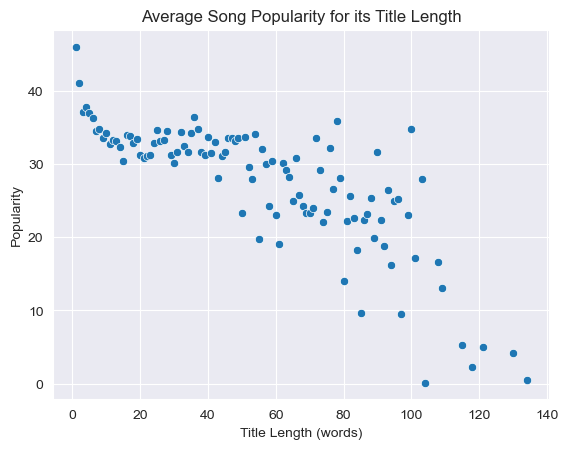

In [102]:
# find word length of song title
df["title_length"] = df["track_name"].apply(lambda x: len(x))
# remove outliers where there are less than 5 songs of a title_length
modified_df = df.groupby("title_length").filter(lambda x: len(x) > 5)
# group by word length and find average streams
modified_df = modified_df.groupby("title_length")['popularity'].mean().reset_index()
# plot word length vs streams
sns.scatterplot(x="title_length", y="popularity", data=modified_df)
# title
plt.title("Average Song Popularity for its Title Length")
# x and y axis labels
plt.xlabel("Title Length (words)")
plt.ylabel("Popularity")
plt.show()

We found a clear negative correlation between the length of a song title and its average popularity. This may be because similar to our analysis for song release date, songs with shorter titles are easier to remember and search for, and thus are more popular.

### Natural Language Processing and Analysis

One of the most interesting aspects we wanted to analyze was what words were most commonly used in song and album titles, and subsequently which words were most conducive to a song's success. To do this, we conducted 3 main forms of analysis which are outlined below:
I. Song Title Word Frequency
II. Album Title Word Frequency
III. Word Frequency in Popular Songs

#### I. Song Title Word Frequency

First, we wanted to see what words were most commonly used in song titles. To do this, we first created a list of all the words in the song titles, and counted the number of times each word appeared. Then we performed a common Natural Language Processing (NLP) technique to remove stopwords: words that are commonly used in the English language but do not add  meaning to a sentence (e.g. "the", "a", "I"). We also removed additional symbols that were not useful in our analysis ("-", "/", "o", "el", "&").
 
Finally, we plotted the 50 most common words in song titles in a bar graph.

[('vivo', 2880), ('remix', 2646), ('ao', 2639), ('(feat.', 2403), ('love', 2341), ('christmas', 1842), ('la', 1504), ('mix', 1493), ('version', 1346), ('live', 1328), ('remastered', 1195), ('edit', 1000), ("don't", 815), ('que', 776), ('original', 768), ('en', 754), ('like', 749), ('radio', 748), ('time', 742), ('song', 722), ('amor', 722), ('little', 708), ('te', 686), ('(from', 680), ('let', 663), ('(with', 615), ('life', 580), ('night', 575), ('remaster', 535), ('good', 516), ('heart', 497), ('da', 488), ("i'm", 475), ('run', 470), ('e', 470), ('no.', 470), ('eu', 466), ('world', 464), ("it's", 456), ('na', 450), ('baby', 447), ('se', 447), ('day', 444), ('home', 422), ('way', 415), ('não', 408), ('man', 399), ('mi', 397), ('tu', 396), ('feel', 395)]


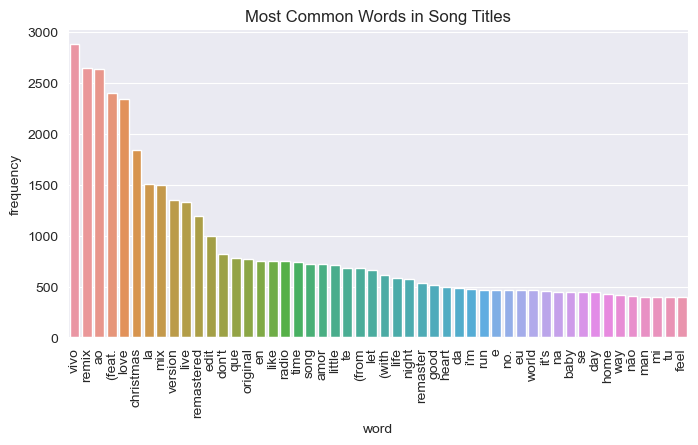

In [103]:
# find most common words in song titles
# convert all song titles to lowercase
df["track_name"] = df["track_name"].str.lower()
# create a list of all the words in the song titles
words = []
for title in df["track_name"]:
    words.extend(title.split())
    # count the number of times each word appears
word_count = Counter(words)
# remove stopwords
for word in list(word_count):
    if word in ENGLISH_STOP_WORDS:
        del word_count[word]
# remove additional words that are not useful
words_to_filter = ["-", "/", "o", "el", "&"]
for word in words_to_filter:
    del word_count[word]
print(word_count.most_common(50))
# plot word frequency
word_count_df = pd.DataFrame(word_count.most_common(50), columns=["word", "frequency"])
dims = (8, 4)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(x="word", y="frequency", data=word_count_df, ax=ax)
# make x axis labels vertical 
plt.xticks(rotation=90)
# title
plt.title("Most Common Words in Song Titles")
plt.show()

There are a few key takeaways from the graph above. 

We see that the most common word in song titles is "vivo". This demonstrates two things. First, it shows the prevalence of the spanish market, as a Spanish, not English word ranked most common. Second, it also shows the popularity of live music, as "vivo" means "live" in Spanish (we also see its English counterpart "live" in the top 10 most common words).

Next, we see the second most common word is "remix", and the fourth most common word is "feat". This shows the popularity and prevalence of collaborations and remixes in the music industry.

Finally, we see that the word "love" is also extremely common within our dataset. This supported one of our original hypotheses that love is a common and popular theme in music (whether that be positive - falling in love, or negative - heartbreak).

#### II. Album Title Word Frequency

Next, we wanted to see what words were most commonly used in album titles. To do this, we similarly created a list of all the words in the album titles, counted their relative frequencies, and removed stopwords and additional symbols.
 
We then plotted the 50 most common words in album titles in the bar graph below.

[('2022', 3281), ('christmas', 3140), ('vol.', 3048), ('hits', 2365), ('(original', 2267), ('(ao', 2023), ('vivo)', 1969), ('best', 1928), ('motion', 1893), ('soundtrack)', 1872), ('picture', 1808), ('2', 1718), ('edition)', 1714), ('halloween', 1675), ('love', 1453), ('rock', 1405), ('pop', 1393), ('la', 1388), ('1', 1379), ('music', 1343), ('songs', 1235), ('perreo', 1211), ('(feat.', 1140), ('party', 1093), ('vivo', 1073), ('en', 877), ('new', 823), ('ao', 807), ('para', 758), ('3', 747), ('(deluxe', 711), ('remix)', 682), ('classics', 676), ('version)', 670), ('del', 651), ('country', 650), ('los', 636), ('ep', 631), ('night', 625), ('y', 622), ('(remastered)', 589), ('(live)', 587), ('time', 565), ('live', 547), ('piano', 538), ('(from', 532), ('good', 518), ('original', 518), ('e', 512), ('4', 511)]


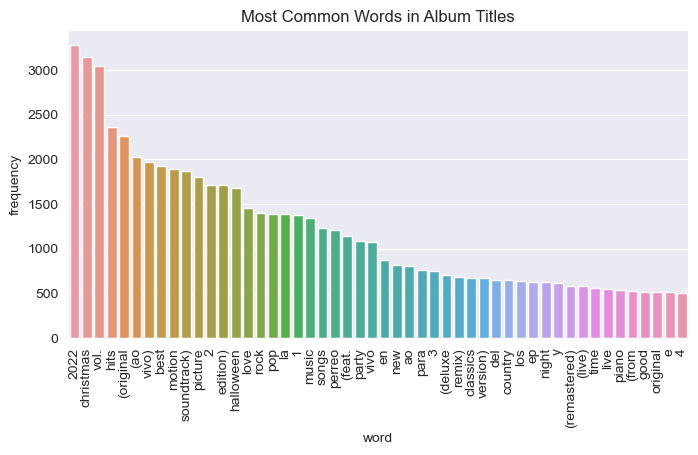

In [104]:
# same but for albums
df["album_name"] = df["album_name"].str.lower()
words = []
for title in df["album_name"]:
    words.extend(title.split())
word_count = Counter(words)
# remove stopwords
for word in list(word_count):
    if word in ENGLISH_STOP_WORDS:
        del word_count[word]
# remove additional words that are not useful
words_to_filter = ["-", "/", "o", "el", "&"]
for word in words_to_filter:
    del word_count[word]

print(word_count.most_common(50))
# plot word frequency
album_word_count_df = pd.DataFrame(word_count.most_common(50), columns=["word", "frequency"])
dims = (8, 4)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(x="word", y="frequency", data=album_word_count_df, ax=ax)
# make x axis labels vertical 
plt.xticks(rotation=90)
# title
plt.title("Most Common Words in Album Titles")
# axis labels
plt.show()

Although the most common word "2022" is not very interesting as likely our dataset contains many albums released in 2022, we see a few other interesting takeaways from the graph above.

First, we see the second most common album word to be "christmas". This is unsurprising as there is a large market for Christmas music, and many artists release Christmas albums.

Second, we see the words "motion" and "picture" both appear high on the list. This is likely because of the popularity of movie soundtracks, which are often released as albums.

Finally, we once again see the word "love" appear high on the list. This supports our above analysis that love is a common (and popular) theme in music.

#### III. Word Frequency in Popular Songs

Finally, we wanted to see what words were most commonly used in popular songs. To do this, we first filtered to only include songs with a popularity of 75 or higher. Then we created a list of all the words in the song titles, counted their relative frequencies, and removed stopwords and additional symbols.

[('(feat.', 192), ('love', 118), ('(with', 84), ('like', 51), ('remix', 50), ('remaster', 41), ("don't", 37), ('la', 37), ('remastered', 32), ('(from', 31), ('heart', 29), ("i'm", 26), ('sweet', 25), ('girl', 25), ('life', 23), ('version', 21), ('good', 20), ('way', 18), ('let', 18), ('bad', 18), ('edit', 18), ('say', 17), ('feel', 17), ('radio', 17), ('know', 17), ('stay', 17), ('te', 17), ('little', 16), ('high', 16), ('man', 16), ('sun', 16), ('black', 16), ('middle', 16), ("you're", 15), ('summer', 15), ('better', 15), ('just', 15), ('(a', 15), ("can't", 14), ('young', 14), ('2009', 14), ("ain't", 14), ('world', 13), ('wanna', 13), ('time', 13), ('baila', 13), ('symphony', 12), ('gonna', 12), ('california', 12), ('hill', 12)]


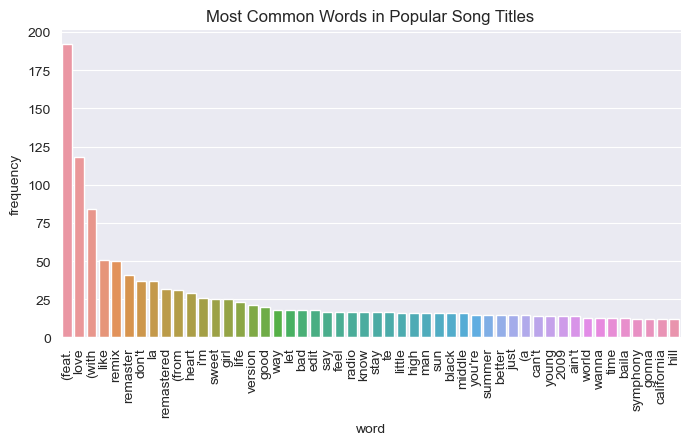

In [105]:
# get all songs with a popularity of 75 or above
df_popular = df[df["popularity"] >= 75]
# create a list of all the words in the song titles
words = []
for title in df_popular["track_name"]:
    words.extend(title.split())
    # count the number of times each word appears
word_count = Counter(words)
# remove stopwords
for word in list(word_count):
    if word in ENGLISH_STOP_WORDS:
        del word_count[word]
# remove additional words that are not useful
words_to_filter = ["-", "/", "o", "el", "&"]
for word in words_to_filter:
    del word_count[word]
print(word_count.most_common(50))
# plot word frequency
word_count_df = pd.DataFrame(word_count.most_common(50), columns=["word", "frequency"])
dims = (8, 4)
fig, ax = plt.subplots(figsize=dims)
# make x axis labels vertical 
plt.xticks(rotation=90)
sns.barplot(x="word", y="frequency", data=word_count_df, ax=ax)
# title
plt.title("Most Common Words in Popular Song Titles")
plt.show()

We see two main takeaways from the graph above.

First, we see the word "feat." be the most popular word in popular song titles (along with similar words like with). This may seem contradictory to our original analysis that songs with more artists are less popular. However, we hypothesize that "feat"/"with" is actually distinctive from just a collaboration with another artist. Rather, because songs that feature an artist will directly call out the artist's name in the song title, it is easily recognizable to a user browsing for new music and easier to garner traffic and clicks.

Second, we also see the word "love" appear high on the list. This once again supports our hypothesis that love is not just a common theme in music, but also a popular one that people enjoy listening to.